# The Highest-Earning Hedge Fund Managers & Traders - 2019 RANKING

https://www.forbes.com/hedge-fund-managers/list/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2019

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'hedge-fund-managers'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
age = []
earnings = []
company = []

for i in range(20):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  age.append(r.json()[i]['age'])
  earnings.append(r.json()[i]['pay'])
  company.append(r.json()[i]['organization'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'Age': age,
  'Earnings': earnings,
  'Company': company
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,Rank,Name,Age,Earnings,Company
0,1,Jim Simons,84,1600.0,Renaissance Technologies Corp.
1,2,Michael Platt,54,1200.0,BlueCrest Capital Management
2,3,Ray Dalio,72,1000.0,Bridgewater Associates
3,4,Ken Griffin,53,870.0,Citadel LLC
4,5,John Overdeck,52,700.0,Two Sigma Investments


In [7]:
df.tail()

,Rank,Name,Age,Earnings,Company
15,15,Peter Muller,58,150.0,PDT Partners
16,15,Robert Prince,63,150.0,Bridgewater Associates
17,18,Steven Schonfeld,63,130.0,Schonfeld Group
18,19,Peter Brown,67,100.0,Renaissance Technologies Corp.
19,19,Paul Singer,77,100.0,Elliott Management


In [8]:
df.shape

(20, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      20 non-null     int64  
 1   Name      20 non-null     object 
 2   Age       20 non-null     int64  
 3   Earnings  20 non-null     float64
 4   Company   20 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 928.0+ bytes


In [10]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 7, 11, 12, 13, 14, 15, 18, 19], ordered=False)

In [11]:
df.describe(include='object')

,Name,Company
count,20,20
unique,20,16
top,Jim Simons,Bridgewater Associates
freq,1,3


In [12]:
round(df['Age'].describe())                                     # generate descriptive statistics for age

count    20.0
mean     63.0
std      12.0
min      47.0
25%      54.0
50%      63.0
75%      71.0
max      86.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

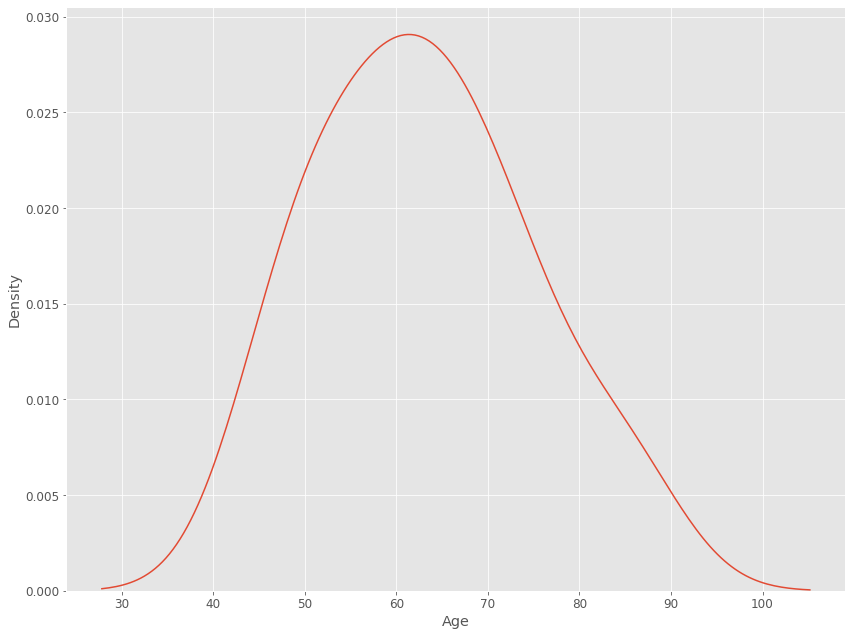

In [13]:
sns.kdeplot(x='Age', data=df)

In [14]:
df['Earnings'].describe()

count      20.000000
mean      514.000000
std       405.247163
min       100.000000
25%       150.000000
50%       490.000000
75%       700.000000
max      1600.000000
Name: Earnings, dtype: float64

<AxesSubplot:xlabel='Earnings', ylabel='Density'>

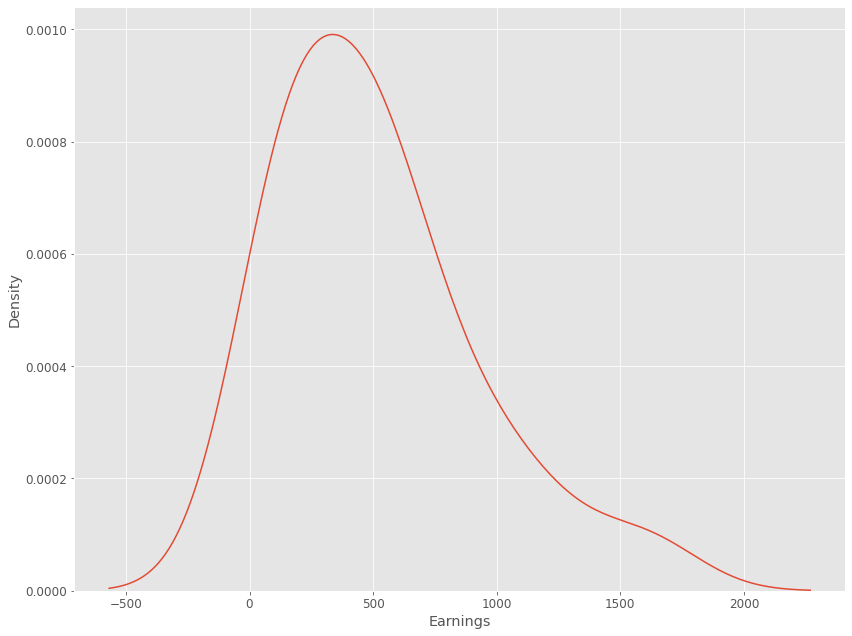

In [15]:
sns.kdeplot(x='Earnings', data=df)

In [16]:
df['Company'].value_counts()                  

Bridgewater Associates            3
Renaissance Technologies Corp.    2
Two Sigma Investments             2
BlueCrest Capital Management      1
Citadel LLC                       1
Millennium Management, L.L.C.     1
Tudor Investment Corporation      1
D. E. Shaw & Co., L.P.            1
Element Capital Management        1
Icahn Capital Management          1
Tiger Global Management           1
Brevan Howard Asset Management    1
Odey Asset Management             1
PDT Partners                      1
Schonfeld Group                   1
Elliott Management                1
Name: Company, dtype: int64

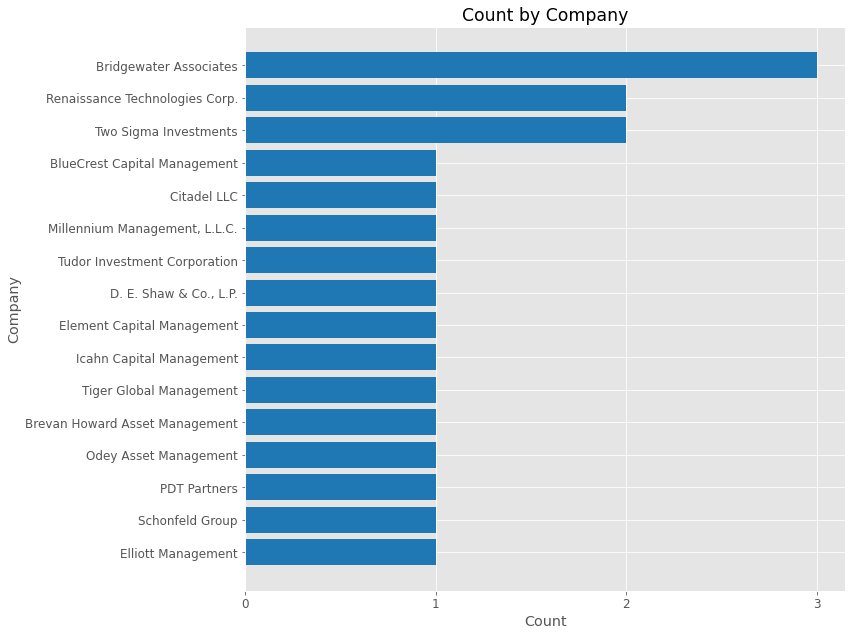

In [17]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Company'].value_counts().keys(), width=df['Company'].value_counts()[:20].values, color='#1f77b4', align='center')
ax.set(title='Count by Company', xlabel='Count', ylabel='Company')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [18]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

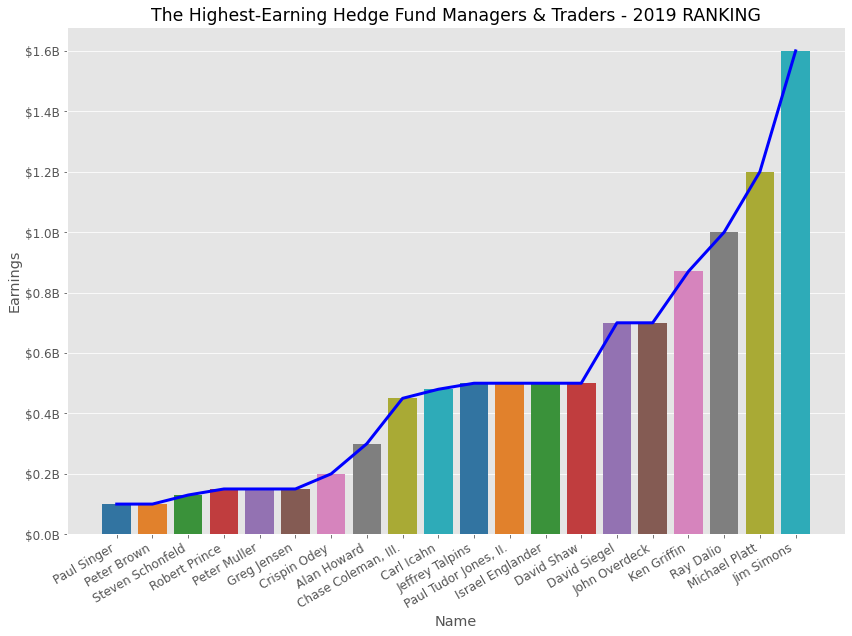

In [19]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

sns.barplot(
  data=df.sort_values(by='Earnings'),
  x='Name', y='Earnings',
  palette='tab10', ax=ax
)

sns.lineplot(
  data=df.sort_values(by='Earnings'),
  x='Name', y='Earnings',
  color='blue', linewidth=3, linestyle='solid', ax=ax
)

ax.set(title='The Highest-Earning Hedge Fund Managers & Traders - 2019 RANKING', xlabel='Name', ylabel='Earnings')

ax.yaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [20]:
df.groupby('Company')\
  .agg(np.sum).sort_values(by='Earnings', ascending=False)['Earnings']

Company
Renaissance Technologies Corp.    1700.0
Two Sigma Investments             1400.0
Bridgewater Associates            1300.0
BlueCrest Capital Management      1200.0
Citadel LLC                        870.0
D. E. Shaw & Co., L.P.             500.0
Element Capital Management         500.0
Millennium Management, L.L.C.      500.0
Tudor Investment Corporation       500.0
Icahn Capital Management           480.0
Tiger Global Management            450.0
Brevan Howard Asset Management     300.0
Odey Asset Management              200.0
PDT Partners                       150.0
Schonfeld Group                    130.0
Elliott Management                 100.0
Name: Earnings, dtype: float64

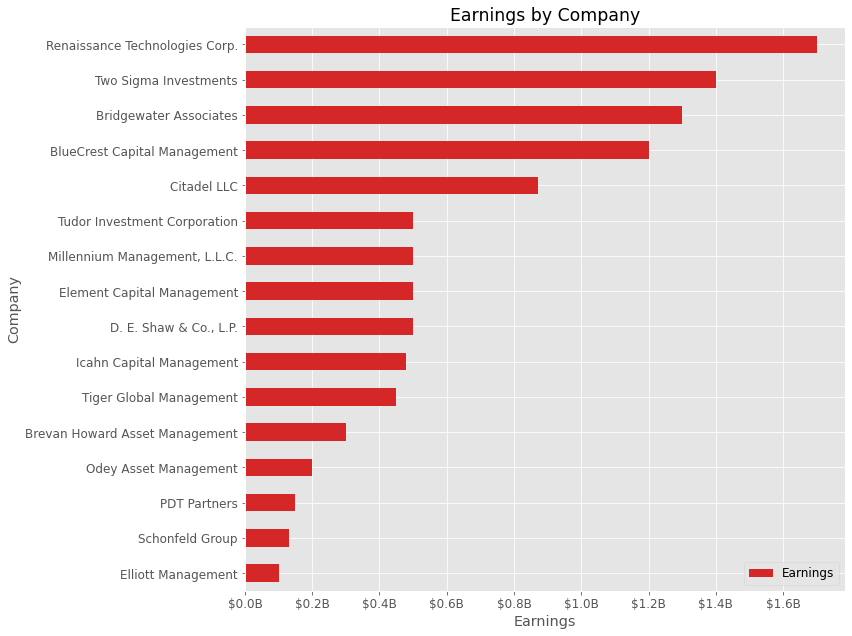

In [21]:
ax = df.drop(columns=['Age']).groupby('Company')\
  .agg(np.sum).sort_values(by='Earnings', ascending=True)\
  .plot(kind='barh', color='#d62728')

ax.set(title='Earnings by Company', xlabel='Earnings', ylabel='Company')
ax.xaxis.set_major_formatter(format_bill)